<a href="https://colab.research.google.com/github/Chanito/mlbourbaki/blob/main/notebooks/Predicci%C3%B3n_de_riesgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar bibliotecas

In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 23.7MB/s 
     |████████████████████████████████| 9.5MB 33.7MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
!pip install arch

     |████████████████████████████████| 808kB 31.0MB/s 


In [3]:
import numpy as np
import pandas as pd
from pandas.util._decorators import Appender

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA 

from pmdarima.arima import auto_arima
import arch

import matplotlib.pyplot as plt

## [Timestamp en Pandas](https://pandas.pydata.org/pandas-docs/version/0.24.2/reference/api/pandas.Timestamp.html)

In [4]:
t = pd.Timestamp.now()
t

Timestamp('2021-07-01 23:43:36.824349')

In [5]:
t.date()

datetime.date(2021, 7, 1)

In [6]:
t.time()

datetime.time(23, 43, 36, 824349)

In [7]:
print('Dia: ', t.day)
print('Mes: ', t.month)
print('Año: ', t.year)
print('Hora: ', t.hour)
print('Minutos: ', t.minute)
print('Segundos: ', t.second)

print('Trimestre: ', t.quarter)
print('Semana: ', t.week)
print('Día de la semana: ', t.weekday(), t.day_name())

Dia:  1
Mes:  7
Año:  2021
Hora:  23
Minutos:  43
Segundos:  36
Trimestre:  3
Semana:  26
Día de la semana:  3 Thursday


In [8]:
print(t.is_month_start)
print(t.is_month_end)

True
False


## [Timedelta en Pandas](https://)

In [9]:
t2 = pd.Timestamp.now()
d = t2 - t
type(d)

pandas._libs.tslibs.timedeltas.Timedelta

In [10]:
d.seconds

827

In [11]:
d.days

0

# Leer datos

In [85]:
datos = pd.read_csv('https://raw.githubusercontent.com/Chanito/mlbourbaki/main/AMZN_5Y.csv',  
# datos = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/Prediccion_de_Riesgo_python/main/Datos/MSFT%202016-2021.csv',
                   usecols=['Date','Adj Close'], index_col='Date', parse_dates=['Date'])
datos.columns = ['Precio']
datos

,Precio
Date,
2016-07-01,725.679993
2016-07-05,728.099976
2016-07-06,737.609985
2016-07-07,736.570007
2016-07-08,745.809998
...,...
2021-06-24,3449.080078
2021-06-25,3401.459961
2021-06-28,3443.889893


In [86]:
#¿Las fechas están ordenadas?
print(datos.index.min() == datos.index[0] and datos.index.max() == datos.index[-1]) 

True


In [87]:

datos.index.day_name()

Index(['Friday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       ...
       'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype='object', name='Date', length=1258)

In [88]:
#años
((datos.index.max()-datos.index.min()).days)/365

5.0

# Exploración y transformación de la serie de precios

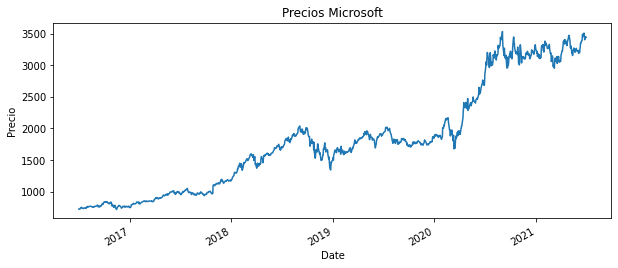

In [92]:
datos['Precio'].plot(figsize=(10,4), title='Precios Microsoft', ylabel = 'Precio',)
plt.show()

¿La serie es estacionaria?
Podemos aplicar ademas la prueba Dickey-Fuller que tiene como Hipótesis nula que la serie NO es estacionaria.

p-value: ¿con qué grado de certeza podemos rechazar la hipotesis nula? 

In [93]:
# ¿La serie es estacionaria?
p_value = adfuller(datos['Precio'])[1]
p_value

0.966004510396572

Observamos que **la serie no es estacionaria** (su *media* y *varianza* cambian con el tiempo).

Tambien observamos que la serie tiene una **tendencia exponencial**, por lo que para obtener una tendencia lineal, realizaremos una transformación logarítmica, para después calcular los retornos.


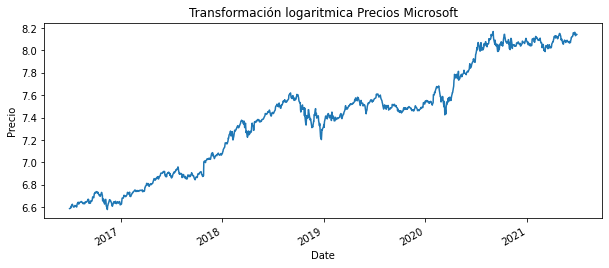

In [94]:
datos['precio_log'] = np.log(datos['Precio'])
datos['precio_log'].plot(figsize=(10,4), title='Transformación logaritmica Precios Microsoft', ylabel = 'Precio',)
plt.show()

In [95]:
datos['retornos_log']= datos['precio_log'].diff()  # en la diferencia perdemos el primer registro
datos.head()

,Precio,precio_log,retornos_log
Date,,,
2016-07-01,725.679993,6.587109,NaN
2016-07-05,728.099976,6.590438,0.003329
2016-07-06,737.609985,6.603415,0.012977
2016-07-07,736.570007,6.602004,-0.001411
2016-07-08,745.809998,6.614471,0.012467


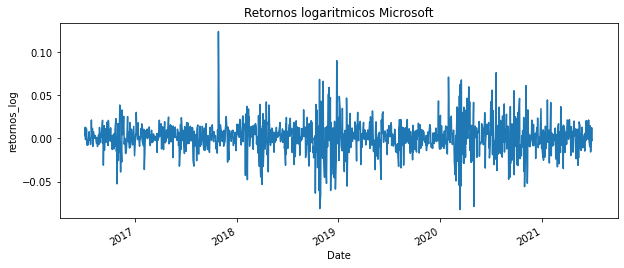

In [96]:

datos['retornos_log'][1:].plot(figsize=(10,4), title='Retornos logaritmicos Microsoft', ylabel = 'retornos_log')
plt.show()

**Observar las diferencias entre precios_log y retornos_log**

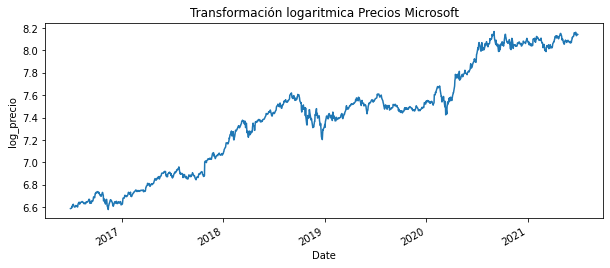

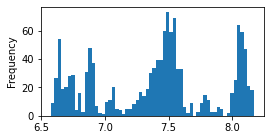

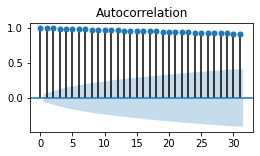

In [97]:
datos['precio_log'] = np.log(datos['Precio'])
datos['precio_log'].plot(figsize=(10,4), title='Transformación logaritmica Precios Microsoft', ylabel = 'log_precio',)
plt.show()

plt.rc("figure", figsize=(4,2))
datos['precio_log'].plot.hist(bins=60)
plt.show()

plot_acf(datos['precio_log'])
plt.show()

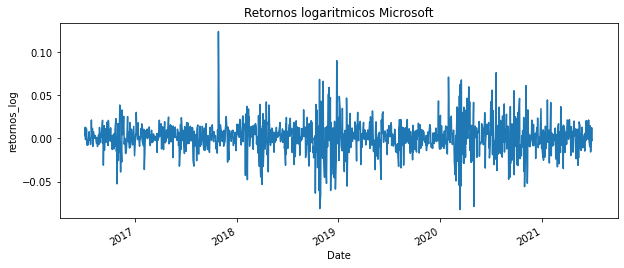

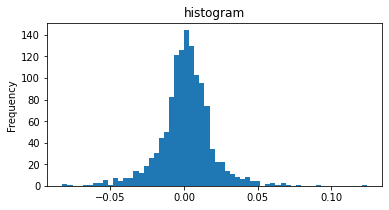

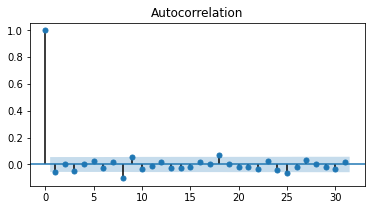

In [100]:

datos['retornos_log'][1:].plot(figsize=(10,4), title='Retornos logaritmicos Microsoft', ylabel = 'retornos_log',)
plt.show()

plt.rc("figure", figsize=(6,3))
datos['retornos_log'][1:].plot.hist(bins=60, title='histogram')
plt.show()

plot_acf(datos['retornos_log'][1:])
plt.show()


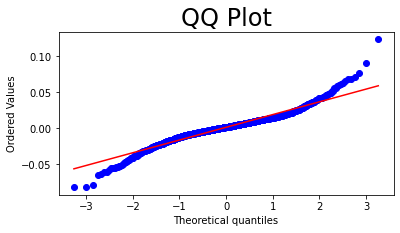

In [99]:
import scipy.stats

scipy.stats.probplot(datos['retornos_log'][1:], plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [101]:
# ¿La serie retornos log es estacionaria?
p_value = adfuller(datos['retornos_log'][1:])[1]
p_value

6.181458030969762e-23

con el resultado anterior, se rechaza la hipotesis nula, siendo la hipotesis alternativa que la serie es estacionaria, por lo que podemos modelarla mediante modelos autregresivos(AR) y de medias moviles(MA) 

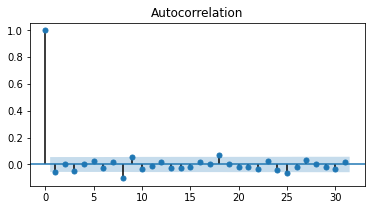

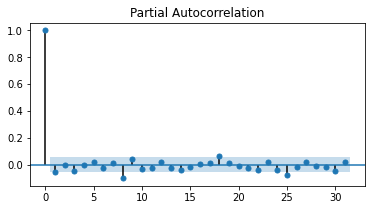

In [102]:
plt.rc("figure", figsize=(6,3))

plot_acf(datos['retornos_log'][1:])
plt.show()

plot_pacf(datos['retornos_log'][1:])
plt.show()

Existen retrasos significativos en los primeros 9 retrasos

In [103]:
model_arma = auto_arima( datos['retornos_log'][1:],
                        stationary= True,  stepwise=False, maxiter=200, trace=False, 
                        information_criterion='aic',max_order=5)
model_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1257
Model:               SARIMAX(1, 0, 0)   Log Likelihood                3249.425
Date:                Fri, 02 Jul 2021   AIC                          -6492.851
Time:                        01:10:33   BIC                          -6477.441
Sample:                             0   HQIC                         -6487.059
                               - 1257                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0013      0.001      2.530      0.011       0.000       0.002
ar.L1         -0.0552      0.019     -2.901      0.004      -0.092      -0.018
sigma2         0.0003   7.48e-06     44.456      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               988.76
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.30   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [104]:
model_arima = auto_arima( datos['precio_log'],
                        stationary= False,  stepwise=False, maxiter=200, trace=False, 
                        information_criterion='aic',max_order=5)
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1258
Model:               SARIMAX(1, 1, 0)   Log Likelihood                3249.425
Date:                Fri, 02 Jul 2021   AIC                          -6492.851
Time:                        01:11:20   BIC                          -6477.441
Sample:                             0   HQIC                         -6487.059
                               - 1258                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0013      0.001      2.530      0.011       0.000       0.002
ar.L1         -0.0552      0.019     -2.901      0.004      -0.092      -0.018
sigma2         0.0003   7.48e-06     44.456      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               988.76
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.30   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Exploración de residuos del modelo ARMA de Retornos

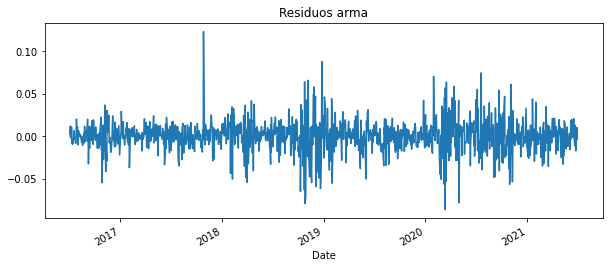

In [105]:
residuos_arma = pd.Series(model_arma.resid(), index = datos.index[1:])
residuos_arma.plot(figsize=(10,4), title='Residuos arma')
plt.show()

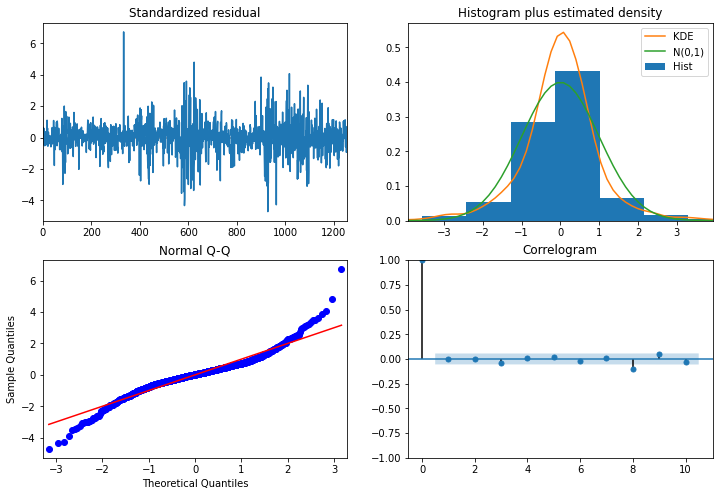

In [106]:

model_arma.plot_diagnostics(figsize=(12,8), lags=10)
plt.show()

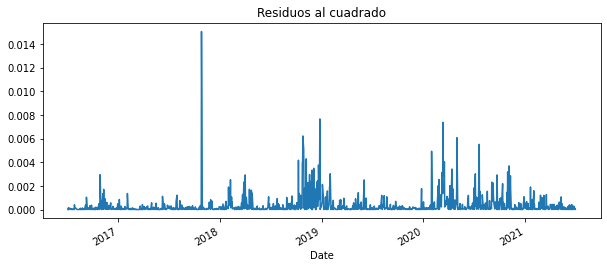

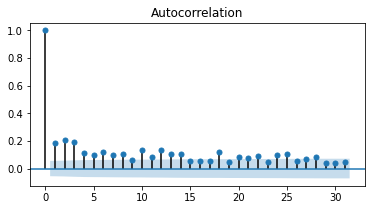

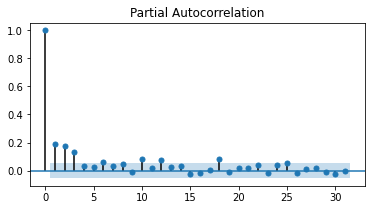

In [107]:
res2 = pow(residuos_arma,2)

res2.plot(figsize=(10,4), title='Residuos al cuadrado')

plot_acf(res2)
plt.show()

plot_pacf(res2)
plt.show()

# GARCH

In [108]:
garch = arch.arch_model(residuos_arma, p=1, q=1, rescale=False ).fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -3381.0134852627452
Iteration:      2,   Func. Count:     19,   Neg. LLF: -3382.891492225188
Iteration:      3,   Func. Count:     32,   Neg. LLF: -3382.8952224693003
Iteration:      4,   Func. Count:     44,   Neg. LLF: -3382.89526805884
Iteration:      5,   Func. Count:     57,   Neg. LLF: -3382.8953161369827
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -3382.8953155531717
            Iterations: 7
            Function evaluations: 65
            Gradient evaluations: 5


In [109]:
garch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3382.90
Distribution:                  Normal   AIC:                          -6757.79
Method:            Maximum Likelihood   BIC:                          -6737.24
                                        No. Observations:                 1257
Date:                Fri, Jul 02 2021   Df Residuals:                     1256
Time:                        01:12:10   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         7.9653e-04  5.156e-04      1.545      0.122 [-2.140e-04,1.807e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.3279e-05  3.073e-06     10.830  2.495e-27 [2.726e-05,3.930e-05]
alpha[1]       0.2000  3.614e-02      5.533  3.140e-08     [  0.129,  0.271]
beta[1]        0.7000  3.573e-02     19.590  1.884e-85     [  0.630,  0.770]
============================================================================

Covariance estimator: robust
"""

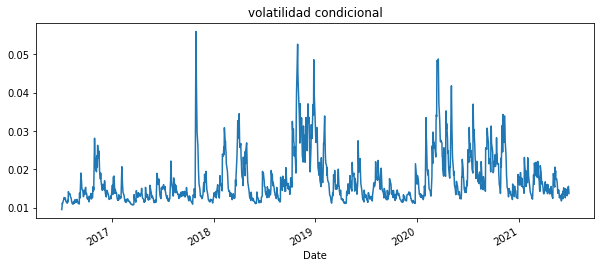

In [110]:
datos['volatilidad_condicional']=np.nan
datos['volatilidad_condicional'][1:]=garch.conditional_volatility
datos['volatilidad_condicional'].plot(figsize=(10,4), title='volatilidad condicional')

# Value at Risk

In [ ]:
# Riesgo del 5% suponiendo una distribución normal 

In [77]:
lim = datos['retornos_log'].quantile(0.05)
lim

-0.02623823264083627

In [111]:
datos['riesgo_5pc_cte'] = np.nan
datos['riesgo_5pc_cte'][1:]=lim

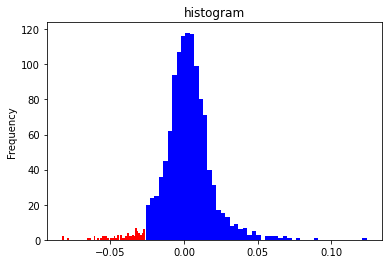

In [112]:
plt.rc("figure", figsize=(6,4))

datos['retornos_log'][lambda x:x>=lim].plot.hist(bins=50, title='histogram', color='blue')
datos['retornos_log'][lambda x:x<lim].plot.hist(bins=50, title='histogram', color='r')
plt.show()

In [80]:
from scipy.stats import norm
lim2=norm(loc = 0 , scale = 1).ppf(0.05)

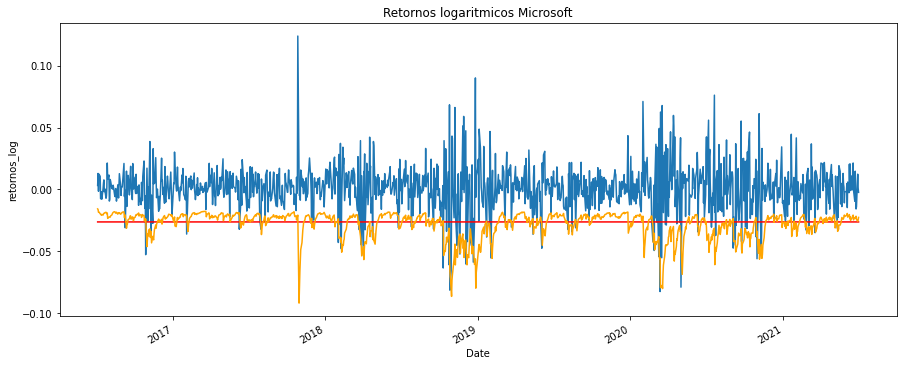

In [113]:
datos['retornos_log'][1:].plot(figsize=(15,6), title='Retornos logaritmicos Microsoft', ylabel = 'retornos_log')
datos['riesgo_5pc_cte'][1:].plot(c='r')
(datos['volatilidad_condicional'][1:]*lim2).plot(c='orange')

plt.show()



# ARIMA para predecir la media

Text(0.5, 1.0, 'Final Forecast of WWW Usage')

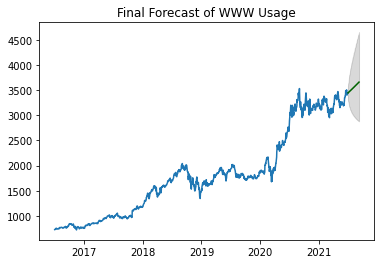

In [124]:
n_periods = 50
fc_log, confint_log = model_arima.predict(n_periods=n_periods, return_conf_int=True, alpha=.05)
fc, confint = np.exp(fc_log), np.exp(confint_log)

# Vamos a crear una serie para graficar más facilmente
ix_fc = pd.date_range(start='7/1/2021', periods=n_periods, freq='B')
fc_series = pd.Series(fc, ix_fc )

lower_series = pd.Series(confint[:, 0],  index=ix_fc )
upper_series = pd.Series(confint[:, 1],  index=ix_fc )

# Plot
plt.plot(datos['Precio'])
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")